In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
path = 'adult.test.csv'
adult_data = pd.read_csv(path)
adult_data.head().T

,0,1,2,3,4
25,38,28,44,18,34
Private,Private,Local-gov,Private,?,Private
226802,89814,336951,160323,103497,198693
11th,HS-grad,Assoc-acdm,Some-college,Some-college,10th
7,9,12,10,10,6
Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married
Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?,Other-service
Own-child,Husband,Husband,Husband,Own-child,Not-in-family
Black,White,White,Black,White,White
Male,Male,Male,Male,Female,Male


In [ ]:
data_header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
adult_data = pd.read_csv(path, names = data_header)
adult_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                16281 non-null  int64 
 1   Workclass          16281 non-null  object
 2   fnlwgt             16281 non-null  int64 
 3   Education          16281 non-null  object
 4   Education-num      16281 non-null  int64 
 5   Marital_Status     16281 non-null  object
 6   Occupation         16281 non-null  object
 7   Relationship       16281 non-null  object
 8   Race               16281 non-null  object
 9   Sex                16281 non-null  object
 10  Capital-gain       16281 non-null  int64 
 11  Capital-loss       16281 non-null  int64 
 12  hrs_per_week       16281 non-null  int64 
 13  Native-Country     16281 non-null  object
 14  Earning_potential  16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [ ]:
adult_data.sample(50)

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
10335,33,Private,152744,Some-college,10,Never-married,Exec-managerial,Own-child,Asian-Pac-Islander,Female,0,0,40,United-States,<=50K.
7935,34,Private,83066,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,<=50K.
10351,55,Private,200217,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K.
7204,31,Private,37939,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.
11044,40,Private,369781,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,15024,0,45,United-States,>50K.
14293,64,Private,64544,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,12,United-States,<=50K.
10522,56,Self-emp-not-inc,368797,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K.
7733,33,Private,307640,Assoc-voc,11,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,<=50K.
14171,28,Local-gov,199172,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
6855,28,Private,145284,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K.


In [ ]:
adult_data = adult_data.replace(to_replace = '%?%', value = np.nan)
adult_data.isna().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

In [ ]:
all_columns = list(adult_data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(adult_data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(adult_data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
Categorical columns:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Earning_potential']
Numerical columns:
 ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


In [ ]:
adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,16281.0,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
fnlwgt,16281.0,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education-num,16281.0,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Capital-gain,16281.0,1081.905104,7583.935968,0.0,0.0,0.0,0.0,99999.0
Capital-loss,16281.0,87.899269,403.105286,0.0,0.0,0.0,0.0,3770.0
hrs_per_week,16281.0,40.392236,12.479332,1.0,40.0,40.0,45.0,99.0


In [ ]:
len(categorical_columns)

9

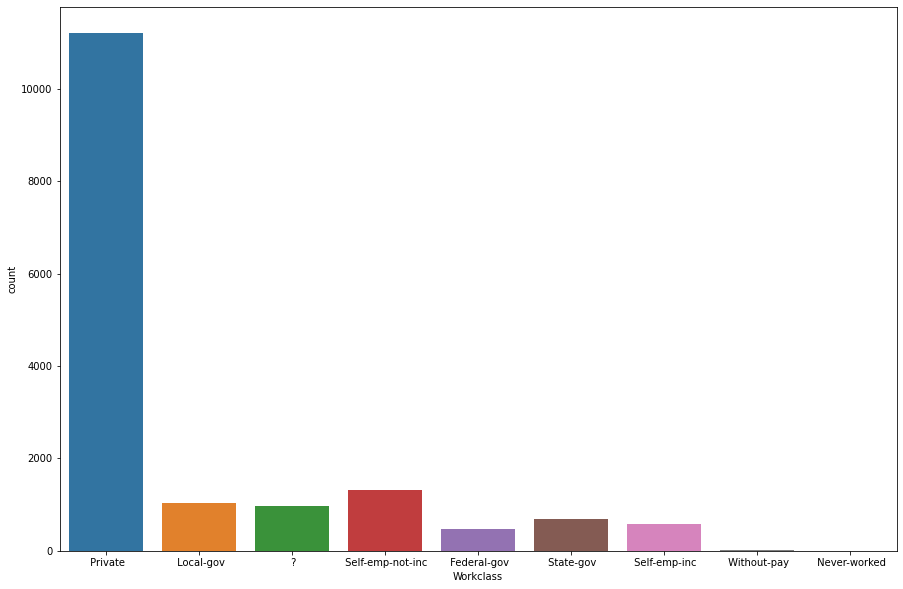

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(adult_data['Workclass'])
plt.show()

In [ ]:
adult_data['Workclass'].value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: Workclass, dtype: int64

In [ ]:
adult_data.groupby(['Workclass', 'Earning_potential']).size()

Workclass          Earning_potential
 ?                  <=50K.               889
                    >50K.                 74
 Federal-gov        <=50K.               282
                    >50K.                190
 Local-gov          <=50K.               733
                    >50K.                310
 Never-worked       <=50K.                 3
 Private            <=50K.              8786
                    >50K.               2424
 Self-emp-inc       <=50K.               263
                    >50K.                316
 Self-emp-not-inc   <=50K.               968
                    >50K.                353
 State-gov          <=50K.               506
                    >50K.                177
 Without-pay        <=50K.                 5
                    >50K.                  2
dtype: int64

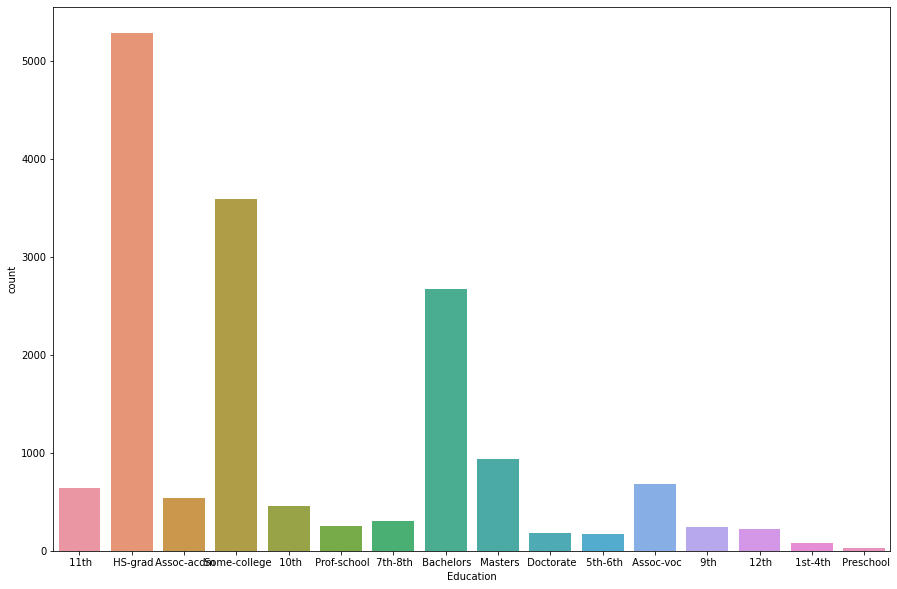

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(adult_data[categorical_columns[1]])
plt.show()

In [ ]:
adult_data['Education'].value_counts()

 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: Education, dtype: int64

In [ ]:
adult_data.groupby(['Education', 'Earning_potential']).size()

Education      Earning_potential
 10th           <=50K.               431
                >50K.                 25
 11th           <=50K.               605
                >50K.                 32
 12th           <=50K.               209
                >50K.                 15
 1st-4th        <=50K.                77
                >50K.                  2
 5th-6th        <=50K.               165
                >50K.                 11
 7th-8th        <=50K.               287
                >50K.                 22
 9th            <=50K.               228
                >50K.                 14
 Assoc-acdm     <=50K.               386
                >50K.                148
 Assoc-voc      <=50K.               518
                >50K.                161
 Bachelors      <=50K.              1578
                >50K.               1092
 Doctorate      <=50K.                56
                >50K.                125
 HS-grad        <=50K.              4455
                >50K.   

In [ ]:
adult_data.groupby(['Education', 'Workclass']).size()

Education      Workclass        
 10th           ?                     48
                Federal-gov            9
                Local-gov             21
                Private              327
                Self-emp-inc           8
                Self-emp-not-inc      37
                State-gov              6
 11th           ?                     60
                Federal-gov            5
                Local-gov             25
                Never-worked           2
                Private              489
                Self-emp-inc           9
                Self-emp-not-inc      46
                State-gov              1
 12th           ?                     18
                Federal-gov            3
                Local-gov              6
                Private              179
                Self-emp-inc           6
                Self-emp-not-inc      11
                State-gov              1
 1st-4th        ?                      6
                Federal-

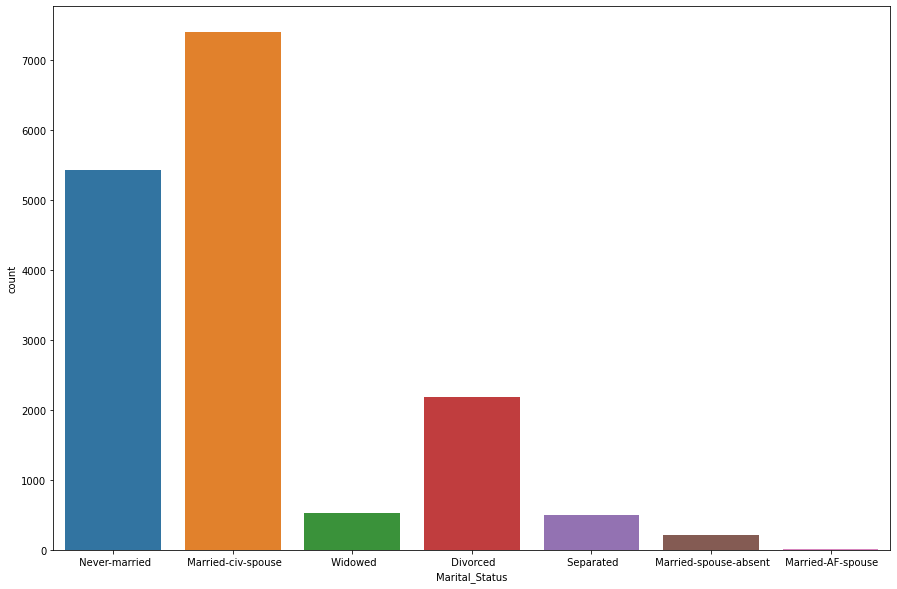

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(adult_data[categorical_columns[2]])
plt.show()

In [ ]:
adult_data['Marital_Status'].value_counts()

 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 Widowed                   525
 Separated                 505
 Married-spouse-absent     210
 Married-AF-spouse          14
Name: Marital_Status, dtype: int64

In [ ]:
adult_data.groupby(['Marital_Status', 'Earning_potential']).size()

Marital_Status          Earning_potential
 Divorced                <=50K.              1982
                         >50K.                208
 Married-AF-spouse       <=50K.                10
                         >50K.                  4
 Married-civ-spouse      <=50K.              4111
                         >50K.               3292
 Married-spouse-absent   <=50K.               186
                         >50K.                 24
 Never-married           <=50K.              5192
                         >50K.                242
 Separated               <=50K.               472
                         >50K.                 33
 Widowed                 <=50K.               482
                         >50K.                 43
dtype: int64

In [ ]:
adult_data.groupby(['Marital_Status', 'Workclass']).size()

Marital_Status          Workclass        
 Divorced                ?                     85
                         Federal-gov           70
                         Local-gov            160
                         Private             1583
                         Self-emp-inc          46
                         Self-emp-not-inc     140
                         State-gov            106
 Married-AF-spouse       ?                      3
                         Private                9
                         Self-emp-not-inc       1
                         State-gov              1
 Married-civ-spouse      ?                    291
                         Federal-gov          250
                         Local-gov            513
                         Private             4741
                         Self-emp-inc         427
                         Self-emp-not-inc     874
                         State-gov            302
                         Without-pay            5
 Married

In [ ]:
adult_data.groupby(['Marital_Status', 'Education']).size()

Marital_Status          Education    
 Divorced                10th              52
                         11th              62
                         12th              24
                         1st-4th            7
                         5th-6th           11
                         7th-8th           28
                         9th               34
                         Assoc-acdm        77
                         Assoc-voc        127
                         Bachelors        297
                         Doctorate         23
                         HS-grad          803
                         Masters          134
                         Preschool          1
                         Prof-school       19
                         Some-college     491
 Married-AF-spouse       10th               1
                         Assoc-voc          1
                         Bachelors          2
                         Doctorate          1
                         HS-grad          

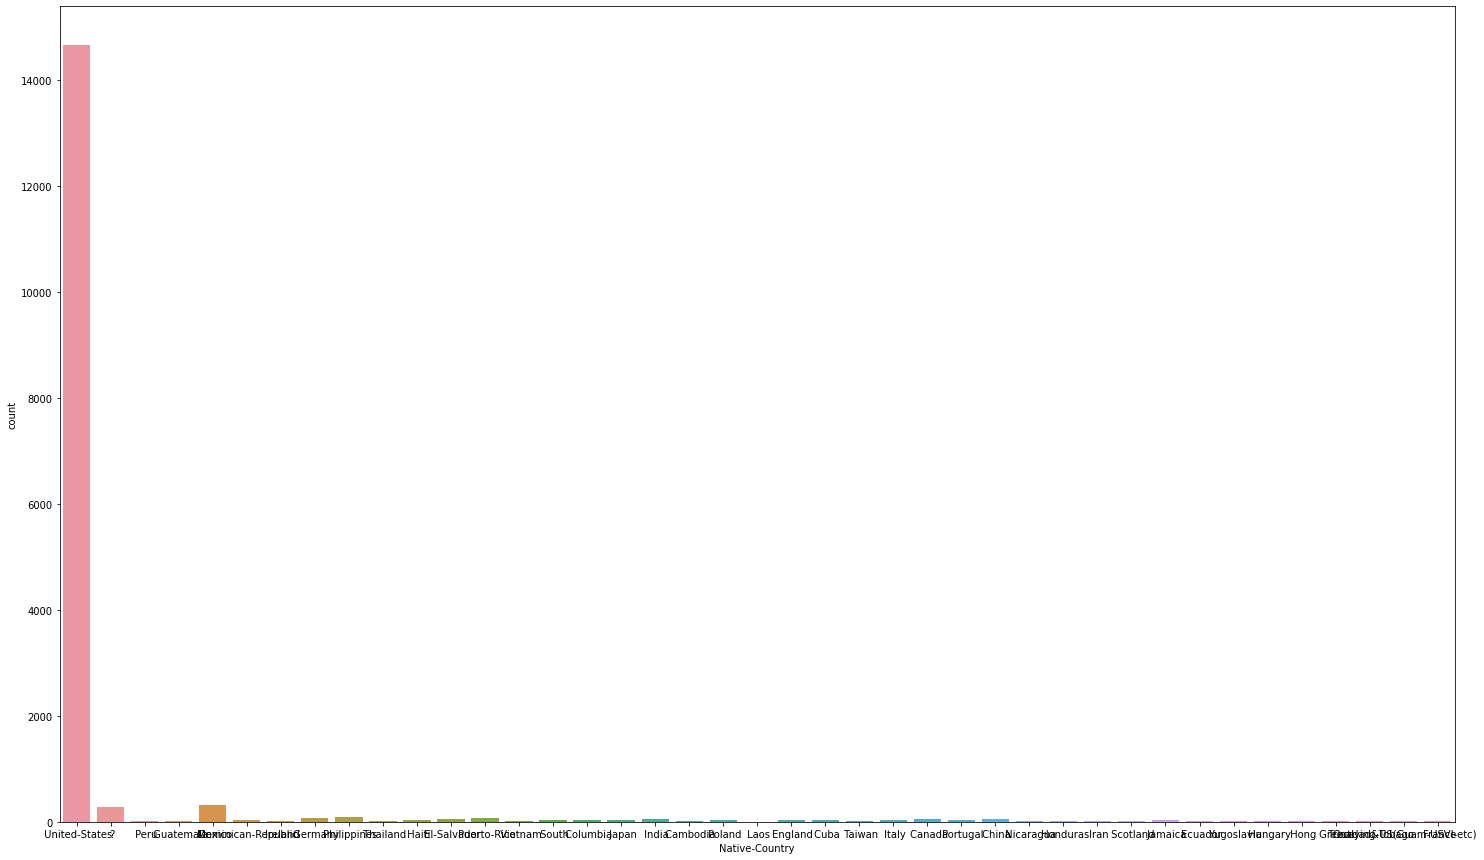

In [ ]:
plt.figure(figsize=(25,15))
sns.countplot(adult_data['Native-Country'])
plt.show()

In [ ]:
adult_data['Native-Country'].value_counts()

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Portugal                         30
 Japan                            30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Peru                             15
 

In [ ]:
adult_data['Occupation'].value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: Occupation, dtype: int64

In [ ]:
adult_data.groupby(['Occupation', 'Education']).size()

Occupation          Education    
 ?                   10th             48
                     11th             62
                     12th             18
                     1st-4th           6
                     5th-6th          11
                     7th-8th          38
                     9th              18
                     Assoc-acdm       25
                     Assoc-voc        22
                     Bachelors        80
                     Doctorate         3
                     HS-grad         279
                     Masters          19
                     Preschool         5
                     Prof-school       6
                     Some-college    326
 Adm-clerical        10th             21
                     11th             33
                     12th             14
                     1st-4th           6
                     5th-6th           2
                     7th-8th           9
                     9th               6
                     As

In [ ]:
adult_data.groupby(['Occupation', 'Workclass']).size()

Occupation          Workclass        
 ?                   ?                    963
                     Never-worked           3
 Adm-clerical        Federal-gov          170
                     Local-gov            138
                     Private             1375
                     Self-emp-inc          16
                     Self-emp-not-inc      20
                     State-gov            122
 Armed-Forces        Federal-gov            6
 Craft-repair        Federal-gov           29
                     Local-gov             65
                     Private             1553
                     Self-emp-inc          61
                     Self-emp-not-inc     267
                     State-gov             38
 Exec-managerial     Federal-gov           88
                     Local-gov            117
                     Private             1304
                     Self-emp-inc         217
                     Self-emp-not-inc     195
                     State-gov            

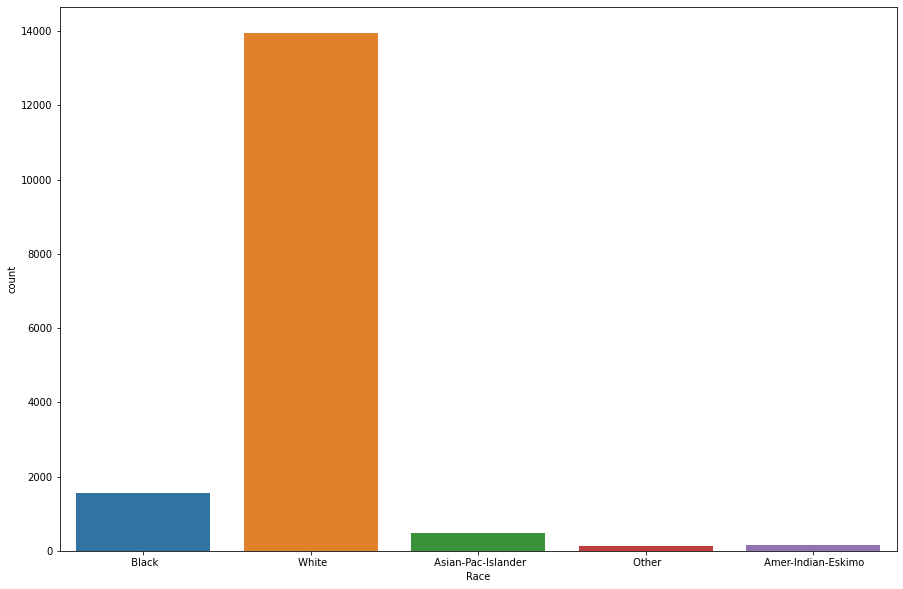

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(adult_data['Race'])

In [ ]:
adult_data.groupby(['Race', 'Earning_potential']).size()

Race                 Earning_potential
 Amer-Indian-Eskimo   <=50K.                140
                      >50K.                  19
 Asian-Pac-Islander   <=50K.                347
                      >50K.                 133
 Black                <=50K.               1382
                      >50K.                 179
 Other                <=50K.                110
                      >50K.                  25
 White                <=50K.              10456
                      >50K.                3490
dtype: int64

In [ ]:
adult_data.groupby(['Race', 'Education']).size()

Race                 Education    
 Amer-Indian-Eskimo   10th               6
                      11th              12
                      7th-8th            1
                      9th                4
                      Assoc-acdm         5
                      Assoc-voc         12
                      Bachelors          8
                      HS-grad           57
                      Masters            8
                      Preschool          1
                      Some-college      45
 Asian-Pac-Islander   10th               3
                      11th               6
                      12th               6
                      1st-4th            5
                      5th-6th           10
                      7th-8th            3
                      9th                1
                      Assoc-acdm        20
                      Assoc-voc         15
                      Bachelors        119
                      Doctorate         18
                   

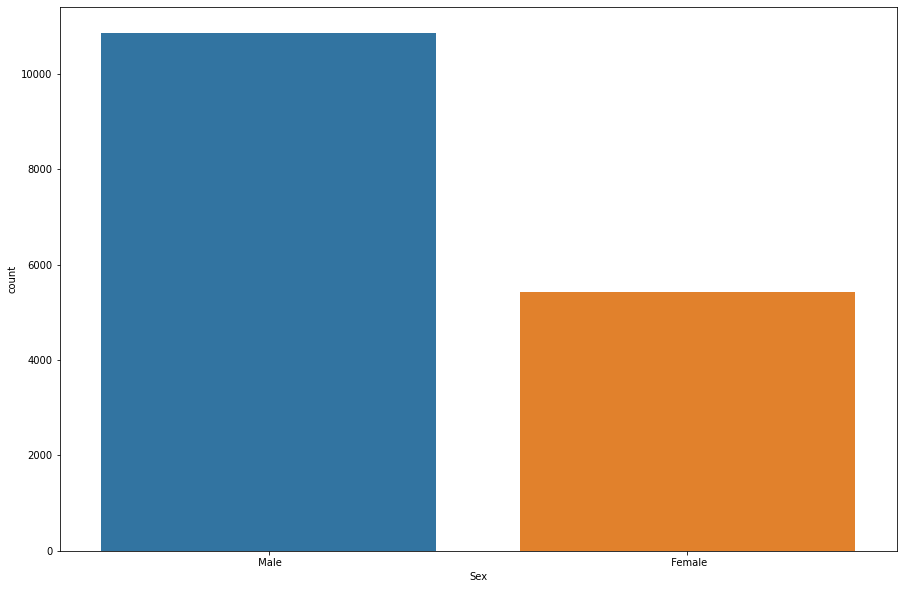

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(adult_data['Sex'])

In [ ]:
adult_data.groupby(['Sex', 'Earning_potential']).size()

Sex      Earning_potential
 Female   <=50K.              4831
          >50K.                590
 Male     <=50K.              7604
          >50K.               3256
dtype: int64

In [ ]:
adult_data.groupby(['Education', 'Sex']).size()

Education      Sex    
 10th           Female     162
                Male       294
 11th           Female     218
                Male       419
 12th           Female      67
                Male       157
 1st-4th        Female      15
                Male        64
 5th-6th        Female      43
                Male       133
 7th-8th        Female      79
                Male       230
 9th            Female      76
                Male       166
 Assoc-acdm     Female     206
                Male       328
 Assoc-voc      Female     234
                Male       445
 Bachelors      Female     858
                Male      1812
 Doctorate      Female      27
                Male       154
 HS-grad        Female    1707
                Male      3576
 Masters        Female     309
                Male       625
 Preschool      Female       8
                Male        24
 Prof-school    Female      40
                Male       218
 Some-college   Female    1372
                

In [ ]:
adult_data.groupby(['Occupation', 'Sex']).size()

Occupation          Sex    
 ?                   Female     432
                     Male       534
 Adm-clerical        Female    1232
                     Male       609
 Armed-Forces        Male         6
 Craft-repair        Female     101
                     Male      1912
 Exec-managerial     Female     589
                     Male      1431
 Farming-fishing     Female      30
                     Male       466
 Handlers-cleaners   Female      90
                     Male       612
 Machine-op-inspct   Female     254
                     Male       766
 Other-service       Female     898
                     Male       730
 Priv-house-serv     Female      87
                     Male         6
 Prof-specialty      Female     727
                     Male      1305
 Protective-serv     Female      46
                     Male       288
 Sales               Female     684
                     Male      1170
 Tech-support        Female     214
                     Male       304


In [ ]:
numerical_columns

['Age',
 'fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'hrs_per_week']

In [ ]:
adult_data.var(axis=0)
adult_data.loc[:, numerical_columns].var()

Age              1.918000e+02
fnlwgt           1.117564e+10
Education-num    6.592289e+00
Capital-gain     5.751608e+07
Capital-loss     1.624939e+05
hrs_per_week     1.557337e+02
dtype: float64

In [ ]:
var_in_float = adult_data.loc[:, numerical_columns].var()
for i in range(len(numerical_columns)):
    print('{} \t\t {}'.format(numerical_columns[i], round(float(var_in_float[i]), 3)))

Age 		 191.8
fnlwgt 		 11175641703.853
Education-num 		 6.592
Capital-gain 		 57516084.765
Capital-loss 		 162493.871
hrs_per_week 		 155.734


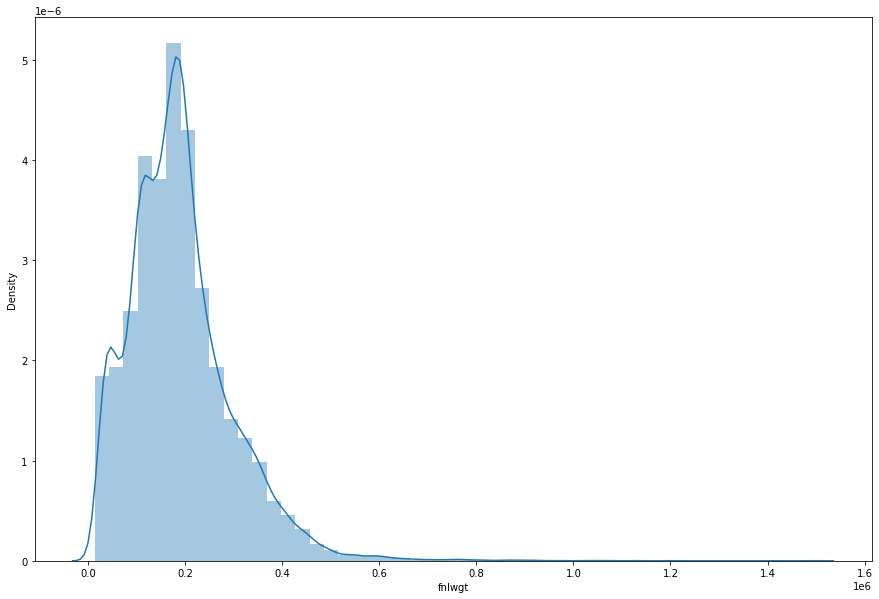

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['fnlwgt'])
plt.show()

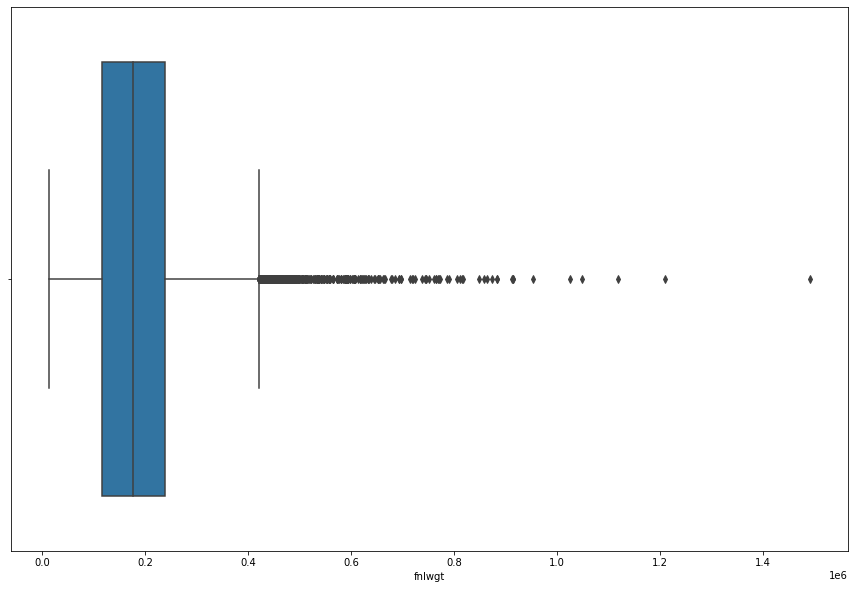

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['fnlwgt'])
plt.show()

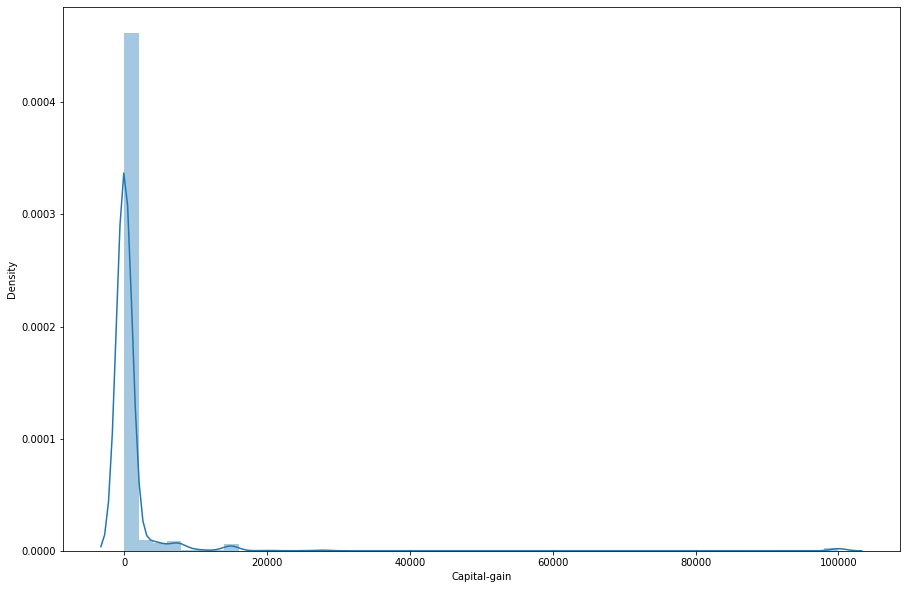

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Capital-gain'])
plt.show()

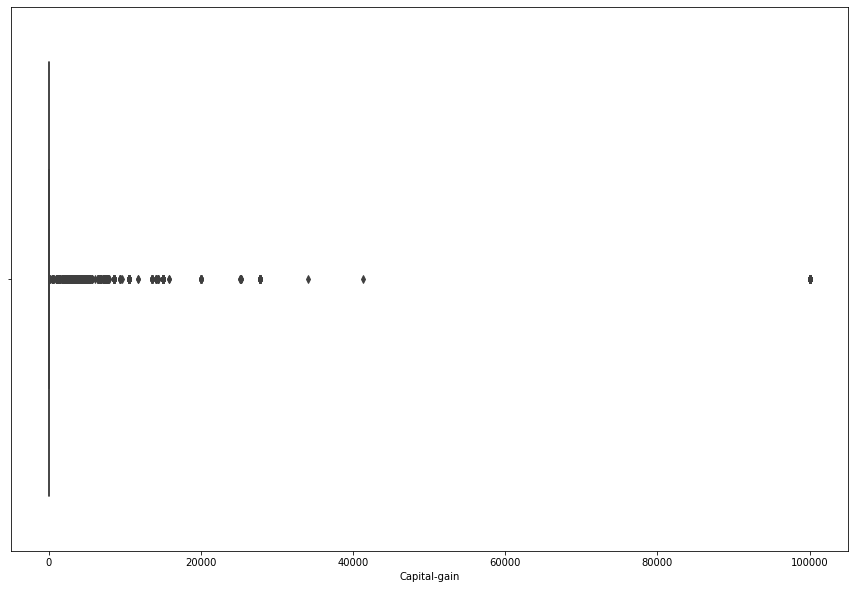

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Capital-gain'])
plt.show()


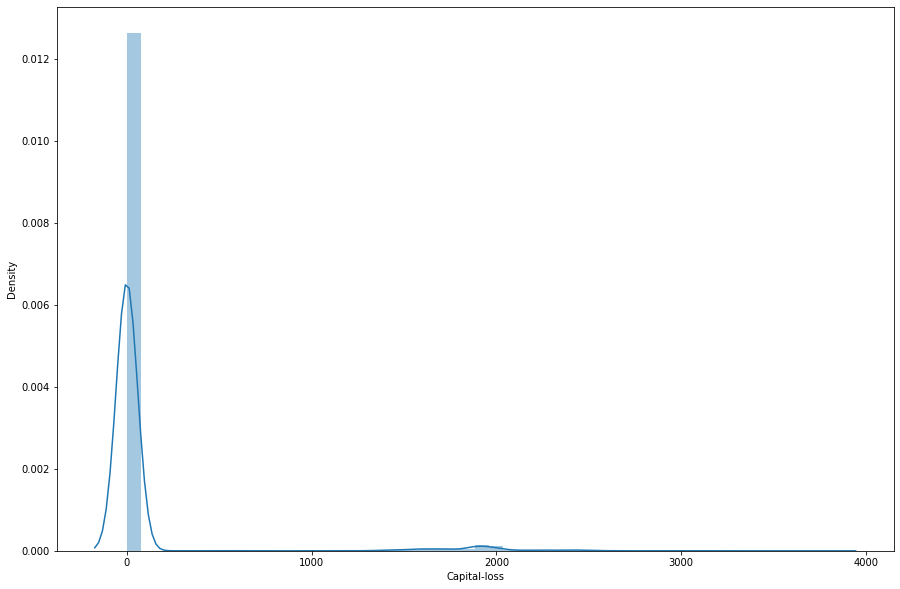

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Capital-loss'])
plt.show()

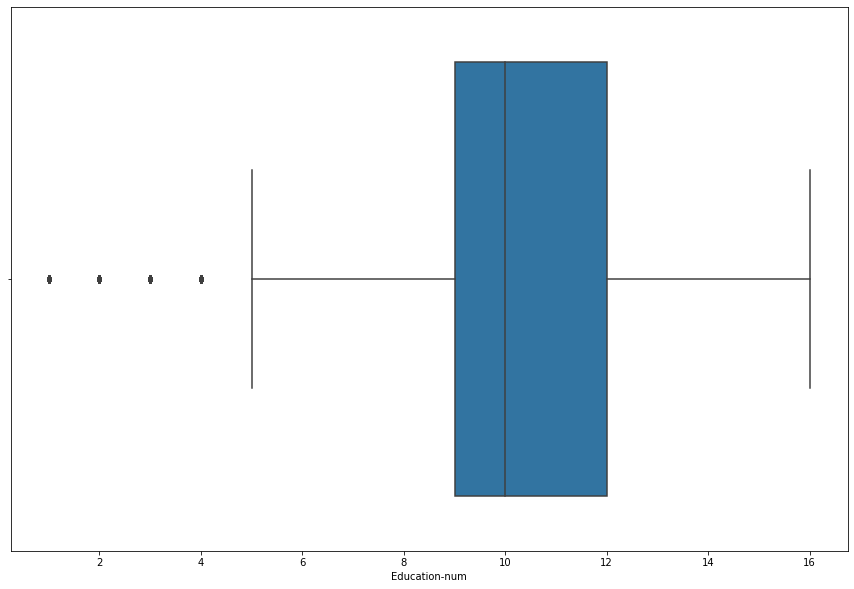

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Education-num'])
plt.show()

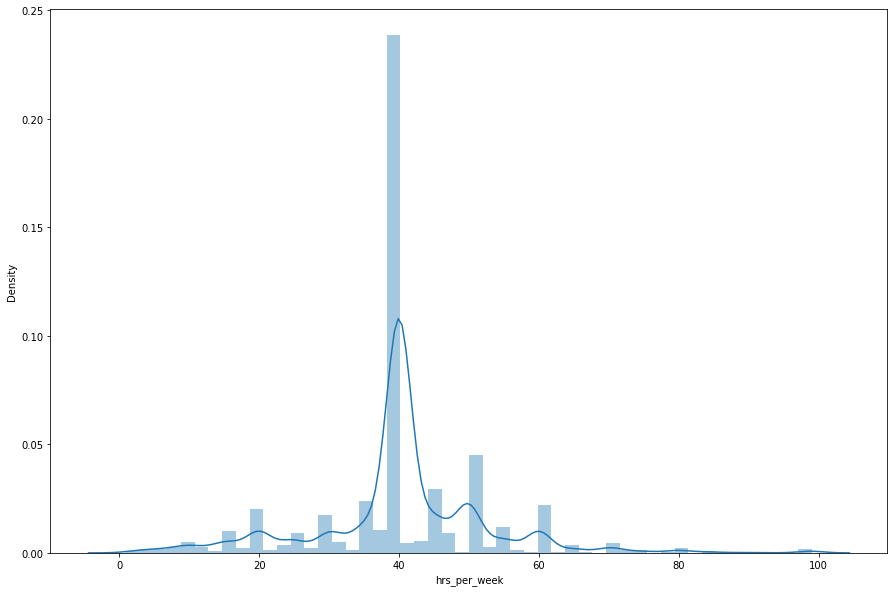

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['hrs_per_week'])
plt.show()

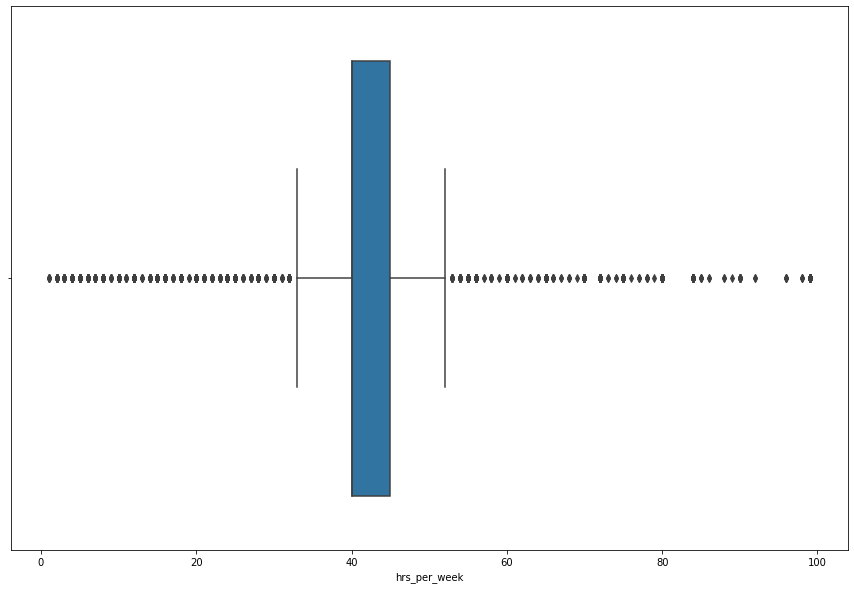

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['hrs_per_week'])
plt.show()

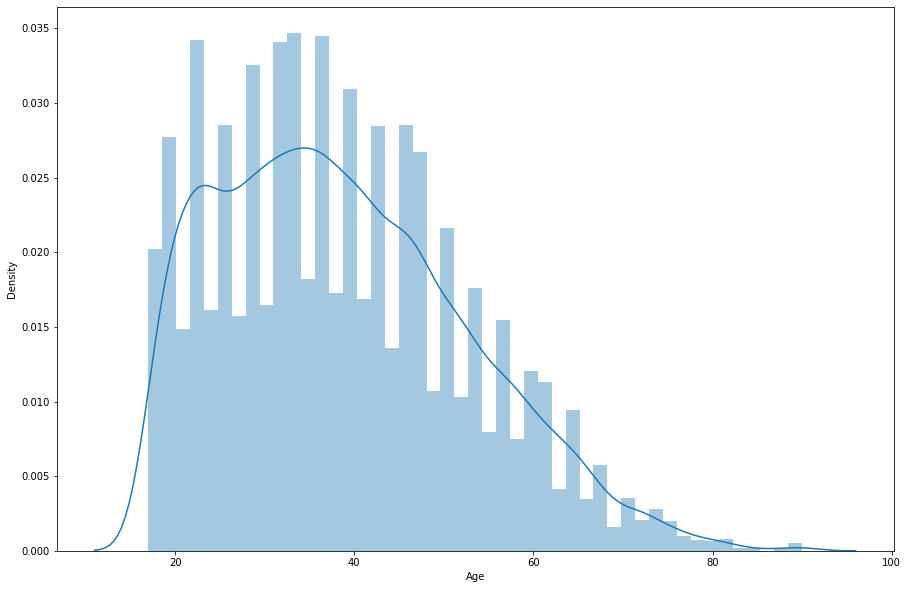

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Age'])
plt.show()

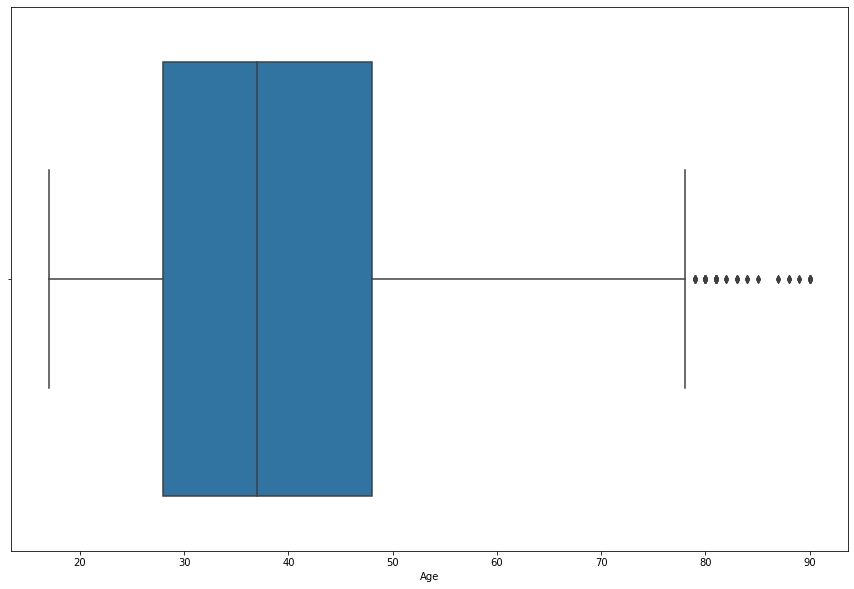

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Age'])
plt.show()

In [ ]:
adult_data.corr()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,hrs_per_week
Age,1.000000,-0.076574,0.019945,0.076377,0.055302,0.077058
fnlwgt,-0.076574,1.000000,-0.029896,-0.011753,0.007386,-0.003155
Education-num,0.019945,-0.029896,1.000000,0.130092,0.083077,0.134899
Capital-gain,0.076377,-0.011753,0.130092,1.000000,-0.031109,0.089390
Capital-loss,0.055302,0.007386,0.083077,-0.031109,1.000000,0.054890
hrs_per_week,0.077058,-0.003155,0.134899,0.089390,0.054890,1.000000


Preprocessing
Null Value Treatment

In [ ]:
null_columns = adult_data.columns[adult_data.isnull().any()]
adult_data[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
for i in list(null_columns):
    adult_data[i].fillna(adult_data[i].mode().values[0],inplace=True)

In [ ]:
print('{null_sum} \n\n {adult_data_info}'.format(null_sum=adult_data.isna().sum(), adult_data_info=adult_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                16281 non-null  int64 
 1   Workclass          16281 non-null  object
 2   fnlwgt             16281 non-null  int64 
 3   Education          16281 non-null  object
 4   Education-num      16281 non-null  int64 
 5   Marital_Status     16281 non-null  object
 6   Occupation         16281 non-null  object
 7   Relationship       16281 non-null  object
 8   Race               16281 non-null  object
 9   Sex                16281 non-null  object
 10  Capital-gain       16281 non-null  int64 
 11  Capital-loss       16281 non-null  int64 
 12  hrs_per_week       16281 non-null  int64 
 13  Native-Country     16281 non-null  object
 14  Earning_potential  16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB
Age                  0
Workclass          

Label Encoding

In [ ]:
adult_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K.
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K.
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K.
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K.
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K.


In [ ]:
label_encoder = LabelEncoder()
encoded_adult_data = adult_data
for i in categorical_columns:
    encoded_adult_data[i] = label_encoder.fit_transform(adult_data[i])
encoded_adult_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,4,1,4,7,3,2,1,38,0
1,4,11,2,5,0,4,1,38,0
2,2,7,2,11,0,4,1,38,1
3,4,15,2,7,0,2,1,38,1
4,0,15,4,0,3,4,0,38,0


Scaling the data

In [ ]:
min_max_scaler = MinMaxScaler()

scaled_encoded_adult_data = pd.DataFrame()

column_values = encoded_adult_data.columns.values
column_values = column_values[:-1]
print(column_values[-1])

scaled_values = min_max_scaler.fit_transform(encoded_adult_data[column_values])

for i in range(len(column_values)):
    scaled_encoded_adult_data[column_values[i]] = scaled_values[:,i]
    
scaled_encoded_adult_data['Earning_potential'] = encoded_adult_data['Earning_potential']
scaled_encoded_adult_data.sample(10)

Native-Country


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
3553,0.479452,0.250,0.123327,0.733333,0.533333,0.000000,0.214286,0.6,1.00,1.0,0.0,0.0,0.397959,0.950,0
13338,0.041096,0.625,0.104728,1.000000,0.600000,0.333333,0.500000,0.0,1.00,1.0,0.0,0.0,0.397959,0.950,0
9717,0.054795,0.875,0.096368,1.000000,0.600000,0.666667,0.571429,0.6,1.00,0.0,0.0,0.0,0.244898,0.950,0
5730,0.534247,0.750,0.198483,0.533333,0.666667,0.333333,0.714286,0.0,1.00,1.0,0.0,0.0,0.397959,0.950,0
6277,0.424658,0.250,0.123179,0.733333,0.533333,0.000000,0.571429,0.2,1.00,0.0,0.0,0.0,0.346939,0.950,0
7382,0.136986,0.250,0.014058,0.600000,0.800000,0.333333,0.785714,0.0,1.00,1.0,0.0,0.0,0.397959,0.950,0
2531,0.041096,0.000,0.109647,1.000000,0.600000,0.666667,0.000000,0.6,1.00,1.0,0.0,0.0,0.397959,0.950,0
8245,0.095890,0.500,0.008921,0.600000,0.800000,0.333333,0.071429,1.0,1.00,0.0,0.0,0.0,0.397959,0.800,0
4782,0.589041,0.125,0.017101,0.933333,0.933333,0.333333,0.714286,0.0,0.25,1.0,1.0,0.0,0.602041,0.725,1
993,0.260274,0.250,0.041371,1.000000,0.600000,0.333333,0.285714,0.0,1.00,1.0,0.0,0.0,0.397959,0.950,0


In [ ]:
scaled_encoded_adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                16281 non-null  float64
 1   Workclass          16281 non-null  float64
 2   fnlwgt             16281 non-null  float64
 3   Education          16281 non-null  float64
 4   Education-num      16281 non-null  float64
 5   Marital_Status     16281 non-null  float64
 6   Occupation         16281 non-null  float64
 7   Relationship       16281 non-null  float64
 8   Race               16281 non-null  float64
 9   Sex                16281 non-null  float64
 10  Capital-gain       16281 non-null  float64
 11  Capital-loss       16281 non-null  float64
 12  hrs_per_week       16281 non-null  float64
 13  Native-Country     16281 non-null  float64
 14  Earning_potential  16281 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.9 MB


In [ ]:
scaled_encoded_adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,16281.0,0.298184,0.189715,0.0,0.150685,0.273973,0.424658,1.0
Workclass,16281.0,0.484192,0.185085,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,16281.0,0.119130,0.071579,0.0,0.069906,0.111272,0.152272,1.0
Education,16281.0,0.684589,0.258865,0.0,0.600000,0.733333,0.800000,1.0
Education-num,16281.0,0.604860,0.171170,0.0,0.533333,0.600000,0.733333,1.0
Marital_Status,16281.0,0.438763,0.251769,0.0,0.333333,0.333333,0.666667,1.0
Occupation,16281.0,0.470544,0.302423,0.0,0.214286,0.500000,0.714286,1.0
Relationship,16281.0,0.287427,0.318581,0.0,0.000000,0.200000,0.600000,1.0
Race,16281.0,0.918110,0.210082,0.0,1.000000,1.000000,1.000000,1.0
Sex,16281.0,0.667035,0.471289,0.0,0.000000,1.000000,1.000000,1.0


Outlier detection

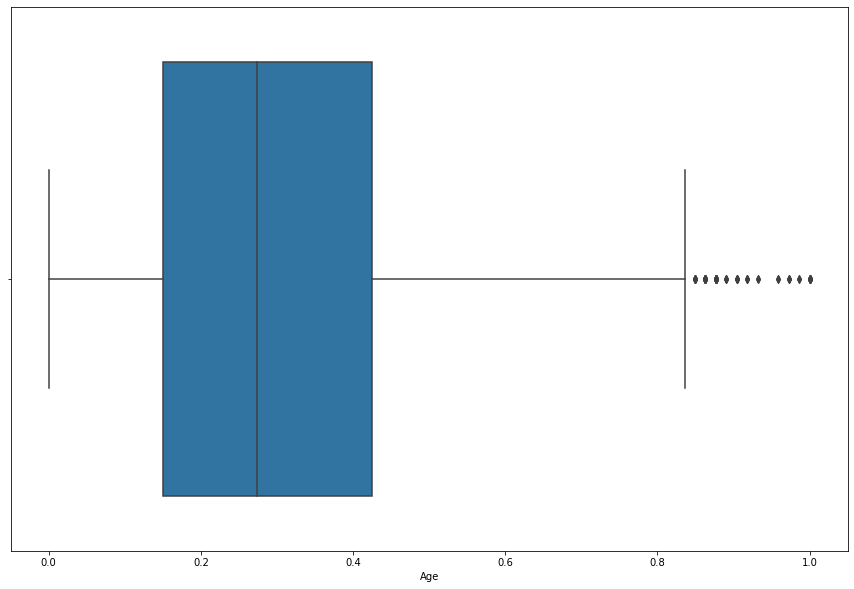

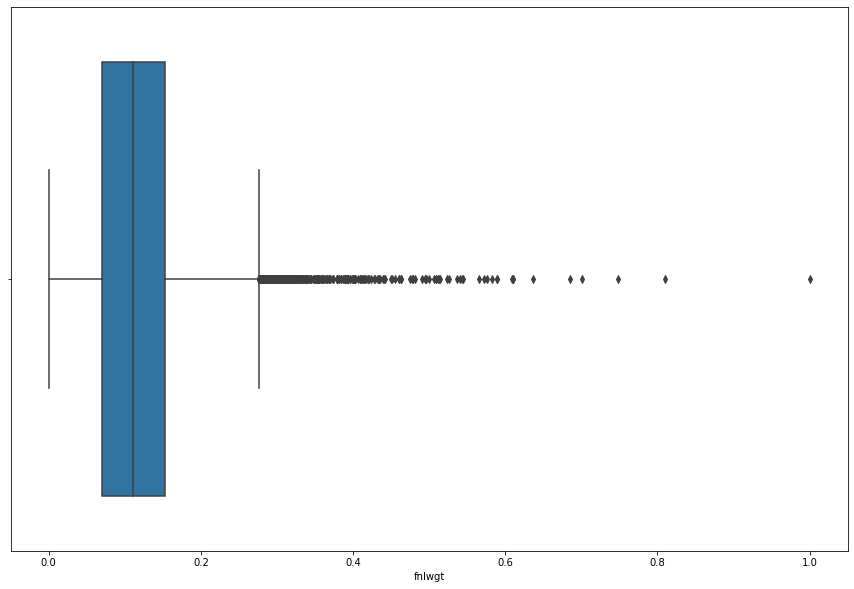

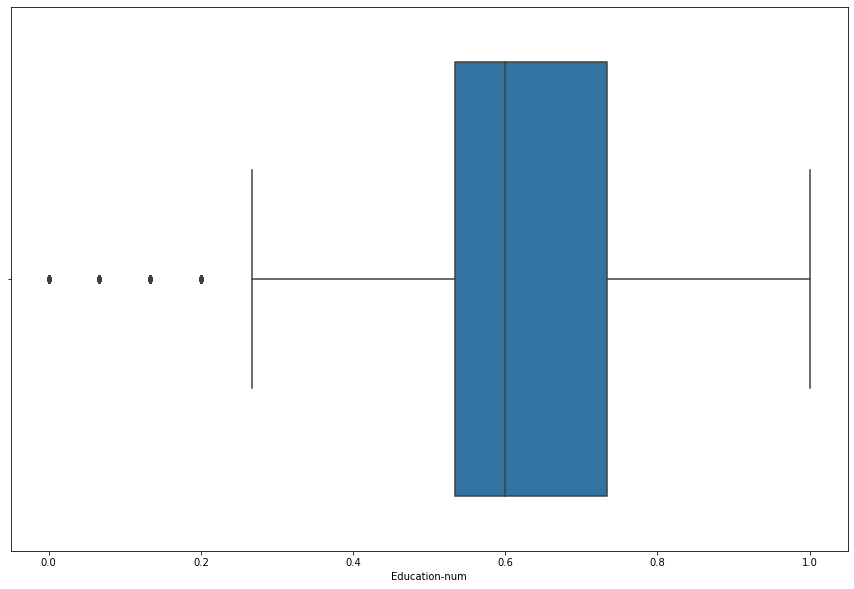

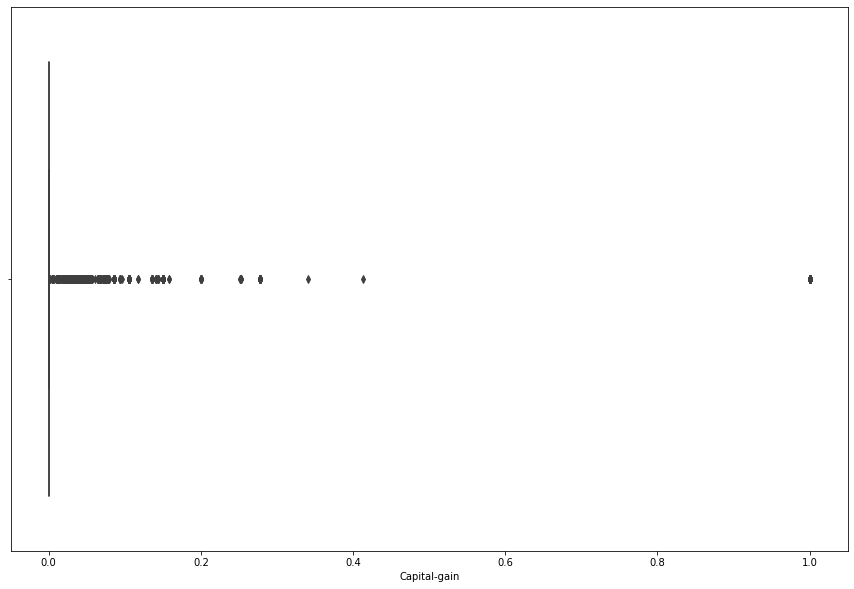

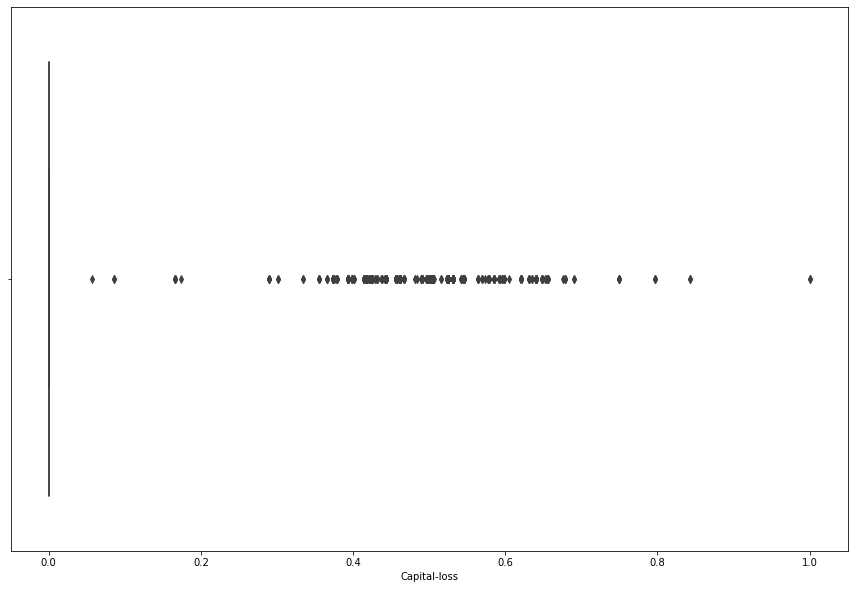

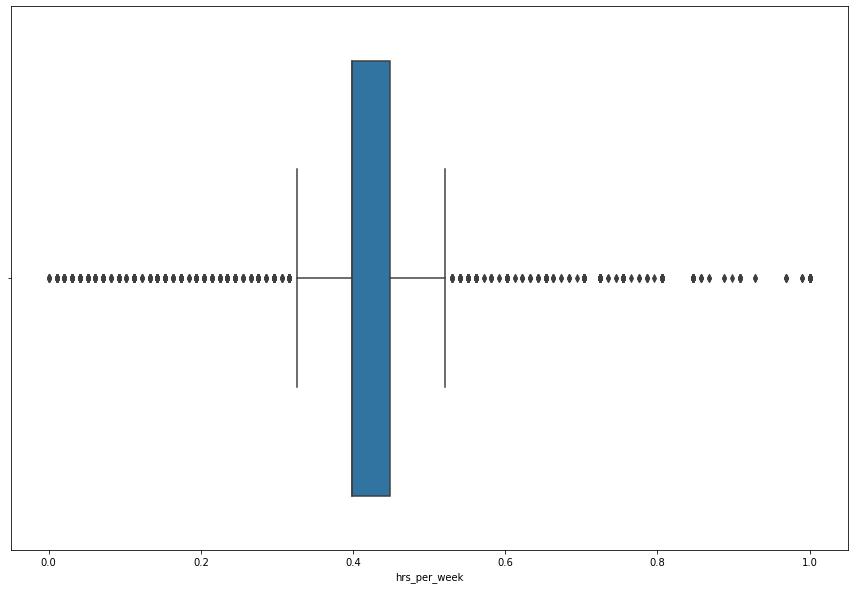

In [ ]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(scaled_encoded_adult_data[numerical_columns[i]])
plt.show()

Outlier Treatment -> Replace with median

In [ ]:
def outlier_detector(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound,upper_bound

In [ ]:
lowerbound, upperbound = outlier_detector(scaled_encoded_adult_data['Age'])
lowerbound, upperbound

(-0.2602739726027397, 0.8356164383561644)

In [ ]:
scaled_encoded_adult_data[(scaled_encoded_adult_data.Age < lowerbound) | (scaled_encoded_adult_data.Age > upperbound)]

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
193,0.849315,0.000,0.023754,0.333333,0.200000,1.000000,0.000000,0.2,1.00,1.0,0.000000,0.000000,0.397959,0.950,0
234,0.863014,0.750,0.127022,0.733333,0.533333,0.333333,0.571429,0.0,1.00,1.0,0.000000,0.000000,0.295918,0.950,0
899,1.000000,0.500,0.091798,0.466667,0.733333,0.333333,0.857143,0.0,1.00,1.0,0.000000,0.484085,0.500000,0.950,1
926,0.849315,0.000,0.009456,0.800000,0.866667,0.666667,0.000000,0.2,1.00,0.0,0.000000,0.000000,0.224490,0.950,0
951,0.863014,0.500,0.084337,0.733333,0.533333,0.500000,0.500000,0.2,1.00,0.0,0.000000,0.000000,0.153061,0.950,0
1079,0.876712,0.500,0.115866,0.333333,0.200000,1.000000,0.500000,0.8,1.00,0.0,0.012640,0.000000,0.397959,0.950,0
1398,0.890411,0.625,0.140276,0.333333,0.200000,1.000000,0.285714,0.2,1.00,0.0,0.000000,0.000000,0.397959,0.950,0
1834,0.904110,0.000,0.010976,0.333333,0.200000,0.333333,0.000000,0.0,1.00,1.0,0.000000,0.000000,0.193878,0.950,0
2085,0.876712,0.750,0.153647,0.600000,0.800000,1.000000,0.357143,0.2,1.00,1.0,0.000000,0.000000,0.295918,0.950,0
2290,0.931507,0.625,0.096478,0.600000,0.800000,1.000000,0.285714,0.2,1.00,1.0,0.000000,0.000000,0.397959,0.950,1


In [ ]:
new_columns = numerical_columns.copy()
new_columns.remove('Capital-gain') 
new_columns.remove('Capital-loss') 
new_columns

['Age', 'fnlwgt', 'Education-num', 'hrs_per_week']

In [ ]:
treated_scaled_encoded_adult_data = scaled_encoded_adult_data.copy()
for i in new_columns:
    lowerbound, upperbound = outlier_detector(treated_scaled_encoded_adult_data[i])
    median = treated_scaled_encoded_adult_data[i].median()
    treated_scaled_encoded_adult_data[i] = treated_scaled_encoded_adult_data[i].replace(
        to_replace = treated_scaled_encoded_adult_data[(treated_scaled_encoded_adult_data[i] < lowerbound) | 
                                                       (treated_scaled_encoded_adult_data[i] > upperbound)][i],
                                      value = median)
    print('{}: number of outliers: {}'.format(i,treated_scaled_encoded_adult_data[
        (treated_scaled_encoded_adult_data[i] < lowerbound) |
        (treated_scaled_encoded_adult_data[i] > upperbound)][i]))

ValueError: ignored

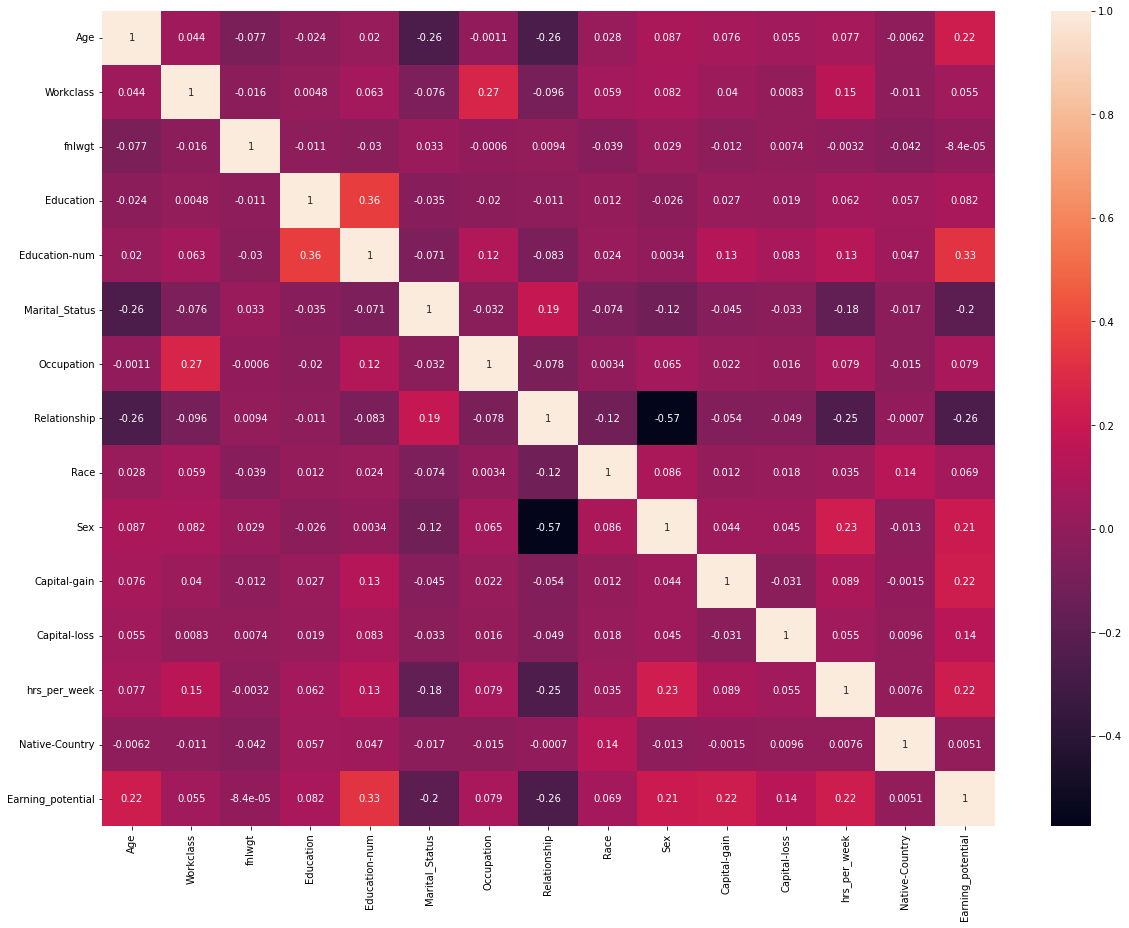

In [ ]:
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(treated_scaled_encoded_adult_data.corr(),annot=True)

In [ ]:
print(all_columns)

features = all_columns[:-1]
target = treated_scaled_encoded_adult_data['Earning_potential']
print(features)
print(treated_scaled_encoded_adult_data.shape)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country']
(16281, 15)


Copy of main dataframe to use for model training

In [ ]:
feature_df = treated_scaled_encoded_adult_data[features]
print(target.head())
feature_df.head()

0    0
1    0
2    1
3    1
4    0
Name: Earning_potential, dtype: int64


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
0,0.109589,0.50,0.144430,0.066667,0.400000,0.666667,0.500000,0.6,0.5,1.0,0.000000,0.0,0.397959,0.95
1,0.287671,0.50,0.051677,0.733333,0.533333,0.333333,0.357143,0.0,1.0,1.0,0.000000,0.0,0.500000,0.95
2,0.150685,0.25,0.219011,0.466667,0.733333,0.333333,0.785714,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95
3,0.369863,0.50,0.099418,1.000000,0.600000,0.333333,0.500000,0.0,0.5,1.0,0.076881,0.0,0.397959,0.95
4,0.013699,0.00,0.060942,1.000000,0.600000,0.666667,0.000000,0.6,1.0,0.0,0.000000,0.0,0.295918,0.95


Train-validation-test splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.2)

print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(13024, 14) (13024,) (3257, 14) (3257,)


Model Building

In [ ]:
logistic_regressor = LogisticRegression()

logistic_regressor.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logistic_train_score = logistic_regressor.score(x_train, y_train)
logistic_test_score = logistic_regressor.score(x_test, y_test)
logistic_prediction = logistic_regressor.predict(x_test)

print('Train Score: {0}\nTest Score: {1}'.format(logistic_train_score, logistic_test_score))

Train Score: 0.8216369778869779
Test Score: 0.8219220141234265


In [ ]:
logistic_mse = mean_squared_error(y_test, logistic_prediction)
logistic_rmse = np.sqrt(logistic_mse)
print(logistic_mse, logistic_rmse)

0.17807798587657353 0.4219928742011807


KNN Classifier

In [ ]:
error_rate = []
k_values = list(filter(lambda x: x%2==1, range(0,50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate.index(np.min(error_rate)))

22


Text(0, 0.5, 'Error Rate')

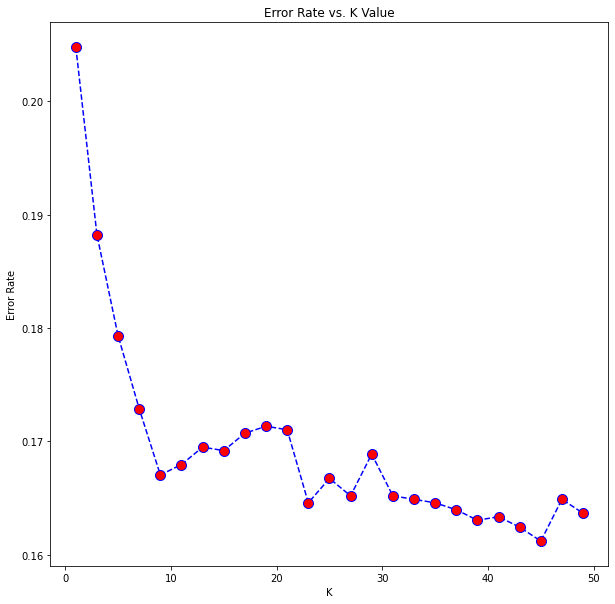

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(knn_train_score, knn_test_score))

Train score: 0.8408323095823096
Test score: 0.8332821614983114


In [ ]:
knn_prediction = knn_classifier.predict(x_test)

knn_classifier_mse = mean_squared_error(y_test, knn_prediction)
knn_classifier_rmse = np.sqrt(knn_classifier_mse)

print('MSE: {}\nRMSE: {}'.format(knn_classifier_mse, knn_classifier_rmse))

MSE: 0.16671783850168867
RMSE: 0.4083109580965084


Support Vector Classifier

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [ ]:
svc_train_score = svc.score(x_train, y_train)
svc_test_score = svc.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(svc_train_score, svc_test_score))

Train score: 0.8429821867321867
Test score: 0.8375805956401596


In [ ]:
svc_prediction = svc.predict(x_test)

svc_mse = mean_squared_error(y_test, svc_prediction)
svc_rmse = np.sqrt(svc_mse)

print('MSE: {}\nRMSE: {}'.format(svc_mse, svc_rmse))

MSE: 0.16241940435984034
RMSE: 0.40301290842830373


Decision Tree Classifier

In [ ]:
dtree_classifier = DecisionTreeClassifier(min_impurity_decrease = 0.05)
dtree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.05)

In [ ]:
dtree_train_score = dtree_classifier.score(x_train, y_train)
dtree_test_score = dtree_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(dtree_train_score, dtree_test_score))

Train score: 0.7631296068796068
Test score: 0.7663494012895302


In [ ]:
dtree_prediction = dtree_classifier.predict(x_test)

dtree_mse = mean_squared_error(y_test, svc_prediction)
dtree_rmse = np.sqrt(dtree_mse)

print('MSE: {}\nRMSE: {}'.format(dtree_mse, dtree_rmse))

MSE: 0.16241940435984034
RMSE: 0.40301290842830373


In [ ]:
model = {
    'Train Score' : [knn_train_score,svc_train_score,dtree_train_score],
    'Test Score' : [knn_test_score,svc_test_score,dtree_test_score]}

In [ ]:
result_base_models = pd.DataFrame(model,index=['Support Vector Classifier','K Nearest Neighbor Model','Decision Tree Model']) 
result_base_models

,Train Score,Test Score
Support Vector Classifier,0.840832,0.833282
K Nearest Neighbor Model,0.842982,0.837581
Decision Tree Model,0.763130,0.766349


Ensembling with Boosting:- AdaBoostClassifier

In [ ]:
adaboost_classifier = AdaBoostClassifier(n_estimators=3)
adaboost_classifier.fit(x_train,y_train)

In [ ]:
adaboost_train_score = adaboost_classifier.score(x_train,y_train)
adaboost_test_score = adaboost_classifier.score(x_test,y_test)
print('Train score: {}\nTest score: {}'.format(adaboost_train_score, adaboost_test_score))

In [ ]:
adaboost_prediction = adaboost_classifier.predict(x_test)

adaboost_mse = mean_squared_error(y_test, adaboost_prediction)
adaboost_rmse = np.sqrt(adaboost_mse)

print('MSE: {}\nRMSE: {}'.format(adaboost_mse, adaboost_rmse))

Ensembling with Bagging:- RandomForest Classifier

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=20, min_samples_split=15, min_impurity_decrease=0.05)
random_forest_classifier.fit(x_train, y_train)

In [ ]:
random_forest_train_score = random_forest_classifier.score(x_train,y_train)
random_forest_test_score = random_forest_classifier.score(x_test,y_test)
print('Train score: {}\nTest score: {}'.format(random_forest_train_score, random_forest_test_score))

In [ ]:
random_forest_prediction = random_forest_classifier.predict(x_test)

random_forest_mse = mean_squared_error(y_test, random_forest_prediction)
random_forest_rmse = np.sqrt(random_forest_mse)

print('MSE: {}\nRMSE: {}'.format(random_forest_mse, random_forest_rmse))

In [ ]:
import graphviz
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=6, random_state=17)
clf = clf.fit(X_train, Y_train)
dot_data = tree.export_graphviz(clf
,out_file = None
,feature_names= feature_name
,class_names=["工资>50K","工资<=50K"]
,filled=True
,rounded=True
)
graph = graphviz.Source(dot_data)
graph